# Prediction Models Part 1: kNN

Regarding the possible linear dependence of the features and to avoid overfitting, we apply:

1. ElasticNet regression

2. kNN

3. Neural Network models. 

In order to decide on model parameters and compare different models' accuracies, we use cross validation techniques like k-fold cross validation, LOOCV, and stratification considering the small number of observations.

In [1]:
#Importing necessary packages

import os
import numpy as np
import sklearn
import pandas as pd
import random

#For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

from sklearn.linear_model import ElasticNet,ElasticNetCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

from scipy import interpolate
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

path = '/Users/nesli/Desktop/SPRING2022/DSCC465/Project/'
os.chdir(path)

random.seed(265) #seed

## Read the data

In [2]:
X=pd.read_csv('X_same_with_location_with_pcs.csv')

In [3]:
y=pd.read_csv('y.csv')

In [4]:
X.drop(columns=X.columns[0], axis=1, inplace=True)

In [5]:
X

,fips,state,county,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,0.000000,0.00,0.000000,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,...,0.377300,-0.617581,0.679175,-0.616937,0.000319,-0.001135,0.000854,7.407887,2.971455,8.557061
1,0.000036,0.00,0.000318,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,...,0.275700,0.989203,0.559721,-0.697775,-0.000572,-0.000812,-0.001181,7.967915,-7.813225,-11.928781
2,0.000073,0.00,0.000636,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,...,0.984700,-2.269580,1.067954,-0.198612,0.001081,0.000067,0.000832,0.075141,6.000968,9.530168
3,0.000109,0.00,0.000955,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,...,0.573700,-3.954990,0.703167,-0.515253,0.001523,0.001325,-0.000975,-7.844172,6.632731,14.093078
4,0.000145,0.00,0.001273,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,...,0.498600,-3.363042,0.250616,-0.987891,0.001420,0.001000,-0.000423,-4.885995,6.370840,15.935434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.999927,1.00,0.998727,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,...,0.535200,1.742262,-0.324346,0.827852,-0.000855,-0.000251,-0.001153,2.224717,8.549556,-10.342960
3140,0.999964,1.00,0.999045,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,...,0.592800,1.945007,-0.577848,0.590881,-0.000947,-0.000035,-0.001048,4.515257,5.636350,-14.508990
3141,1.000000,1.00,0.999364,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,...,0.271600,3.054007,-0.601615,0.578433,-0.001263,0.000957,0.000265,-2.678241,5.768869,-15.942137
3142,0.672171,0.50,0.999682,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,...,0.392899,0.731736,0.018675,0.484228,-0.000450,-0.000988,-0.001003,3.145697,-4.512575,-4.056016


In [6]:
y

,Unnamed: 0,life_expectancy
0,0,76.879477
1,1,78.450258
2,2,75.341935
3,3,73.571820
4,4,74.145826
...,...,...
3139,3139,79.245997
3140,3140,79.451504
3141,3141,80.549081
3142,3142,78.173254


In [7]:
y.drop(columns=y.columns[0], axis=1, inplace=True)

In [8]:
y

,life_expectancy
0,76.879477
1,78.450258
2,75.341935
3,73.571820
4,74.145826
...,...
3139,79.245997
3140,79.451504
3141,80.549081
3142,78.173254


Here, our data is not given with training and test sets. So we will be building models by dividing the data to test and train sets using different methods.

## Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=465)

This is the same test and train data sets as used for ElasticNet. So we can compare their results.

## kNN Regressor Model

We follow from [1]. We first try with predicting a value by checking the 3 nearest neighbors. This is a parameter that we can tune later.

In [10]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [11]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# Predict for the training set
y_train_pred = knn_model.predict(X_train)

In [13]:
mse = mean_squared_error(y_train, y_train_pred)
mse

0.04048772518223173

In [14]:
# RMSE
np.sqrt(mse)

0.20121561863392148

In [15]:
# Now, for the test set
y_pred = knn_model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
mse

0.054048884310930544

In [17]:
# RMSE
np.sqrt(mse)

0.23248415926882104

In [18]:
X_test

,fips,state,county,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
1480,0.493387,0.48,0.470888,0.520039,0.600219,0.404362,0.589404,0.61,0.211106,0.004511,...,0.9452,-3.226544,0.304360,0.215790,0.001408,0.000962,-0.000360,-7.040801,2.658403,11.438104
2451,0.836531,0.84,0.779828,0.387876,0.484332,0.404462,0.501104,0.80,0.250911,0.009867,...,0.3145,0.493347,-0.617370,0.102285,-0.000291,-0.001141,-0.000651,9.585769,-8.578540,-2.627006
892,0.345324,0.32,0.283805,0.282916,0.325315,0.321318,0.589404,0.75,0.426184,0.005075,...,0.5081,0.846664,0.248724,-0.257539,-0.000507,-0.000910,-0.001101,7.866174,-0.498021,-4.601628
324,0.199985,0.18,0.103086,0.288579,0.528951,0.307951,0.379691,0.71,0.526955,0.116154,...,0.4266,0.280160,0.328637,-0.530402,-0.000201,-0.001188,-0.000435,10.964335,1.882023,-0.192644
1105,0.367415,0.34,0.351575,0.459793,0.625742,0.463869,0.419426,0.71,0.382054,0.003947,...,0.6141,-3.680665,0.188431,-0.185412,0.001504,0.001263,-0.000863,-7.922988,4.309987,13.216552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.218371,0.20,0.126312,0.403162,0.407723,0.369793,0.534216,0.57,0.250101,0.038906,...,0.9172,-3.188810,1.058672,0.213308,0.001374,0.000866,-0.000221,-5.705878,6.448903,9.509603
1027,0.364581,0.34,0.326758,0.390428,0.634066,0.455557,0.476821,0.76,0.417920,0.001692,...,0.7892,-3.418196,-0.017053,-0.456804,0.001453,0.001099,-0.000580,-6.677168,3.132814,15.635482
480,0.221423,0.20,0.152720,0.394314,0.454407,0.373613,0.258278,0.66,0.282193,0.010431,...,0.9484,-3.368737,0.803723,0.004166,0.001427,0.001022,-0.000458,-6.073980,6.878463,11.320167
538,0.223567,0.20,0.171174,0.367536,0.387463,0.314736,0.295806,0.71,0.261494,0.001410,...,0.7663,0.905441,0.373305,-0.445291,-0.000532,-0.000869,-0.001122,6.034483,-7.690073,-10.922236


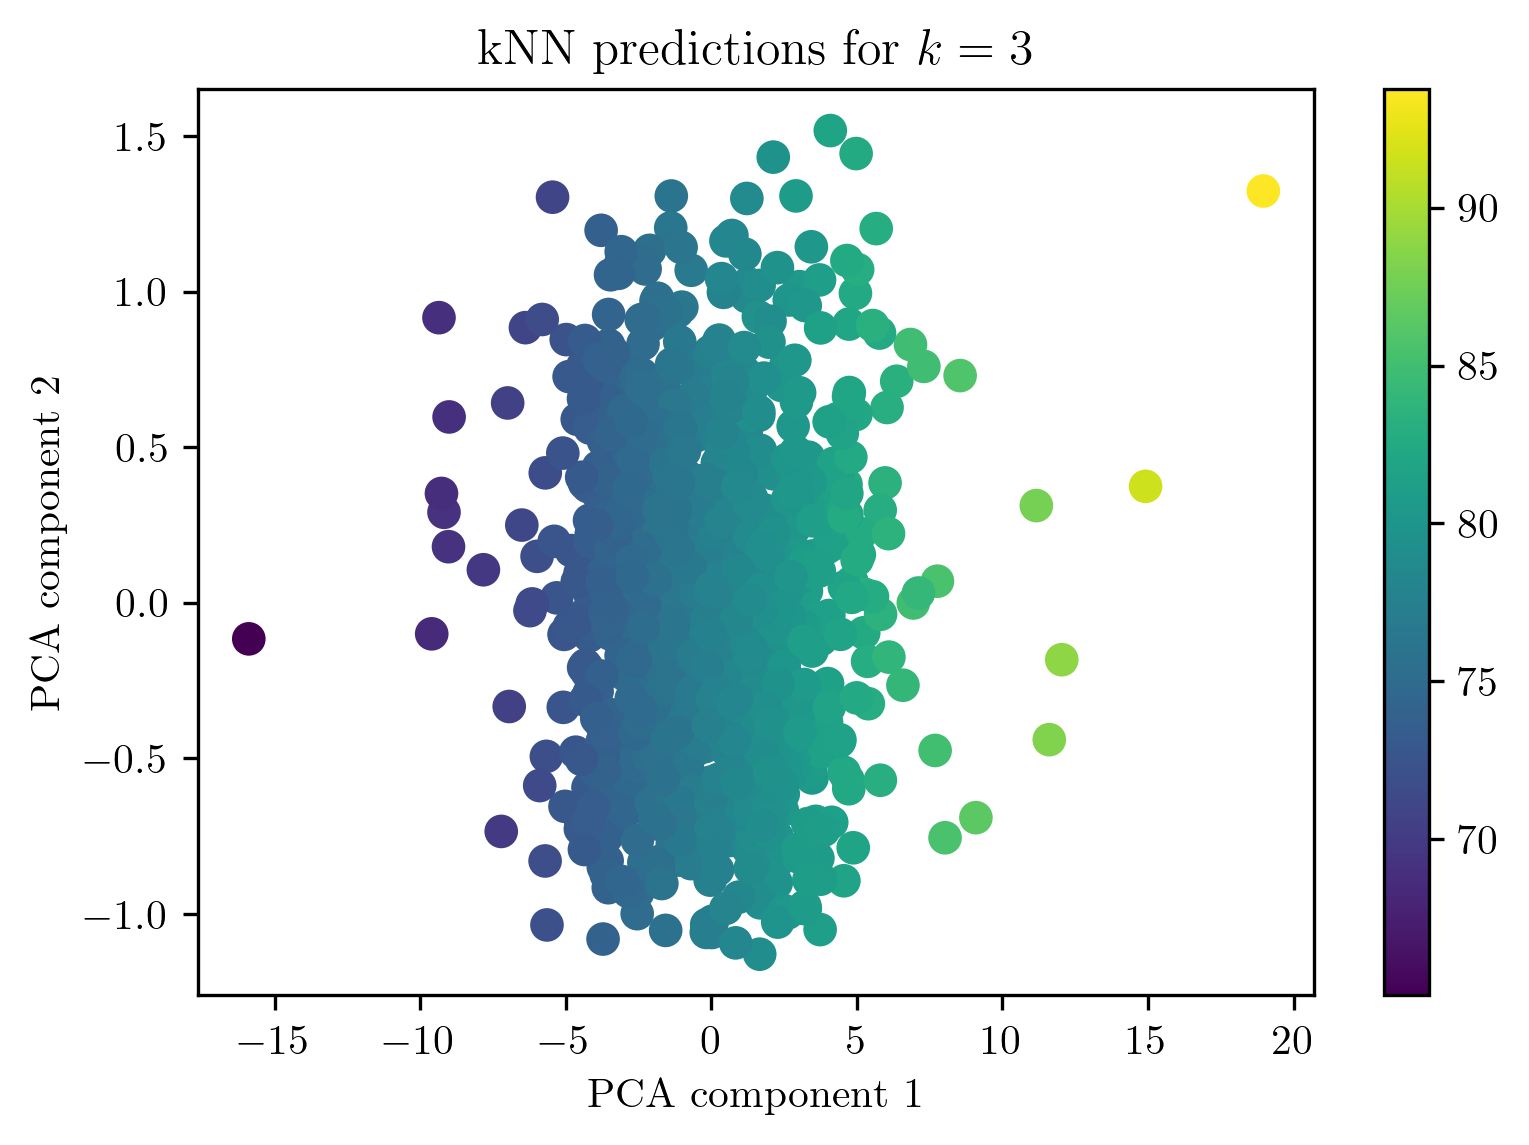

In [19]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=3$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

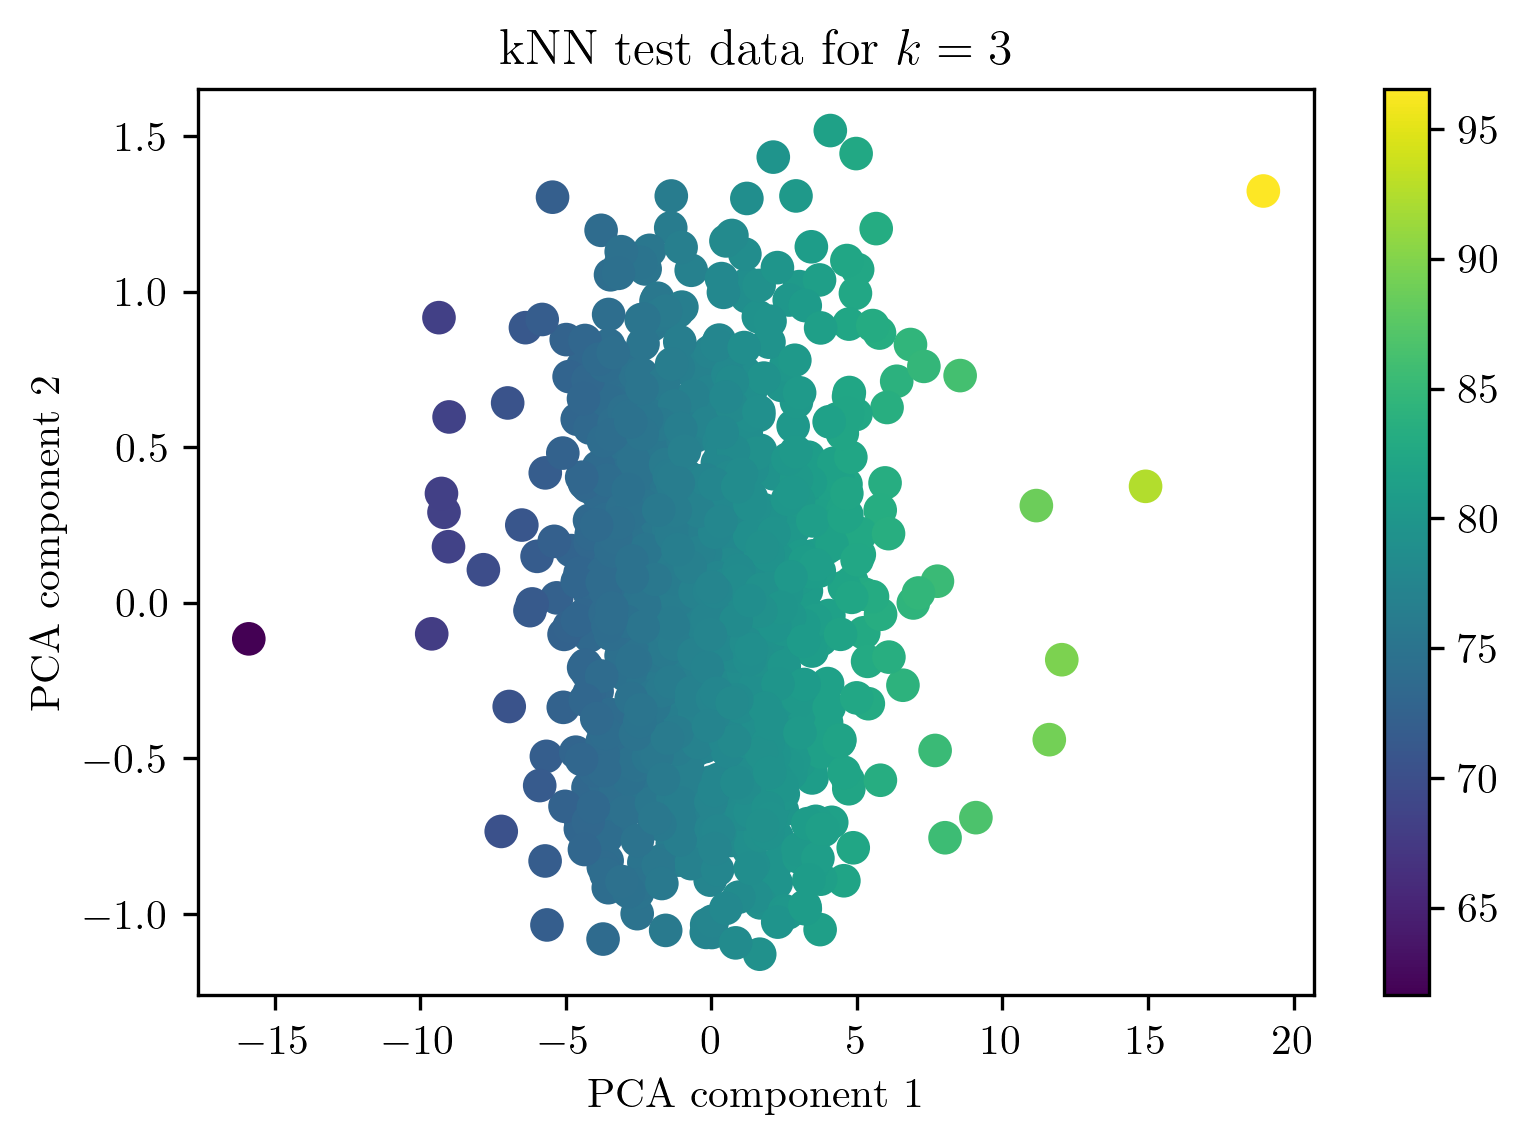

In [20]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=3$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

## Now, tune the parameter k

In [21]:
k_values=[1, 10, 100, 1000]

In [22]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=0.2091574473370676, and MSE=0.0437468377765582
For k=10
For training set, RMSE=0.35988575057813393, and MSE=0.1295177534691868
For test set, RMSE=0.31054435969773736, and MSE=0.09643779934007769
For k=100
For training set, RMSE=0.7328409589238277, and MSE=0.5370558710763954
For test set, RMSE=0.7321795088406937, and MSE=0.5360868331661995
For k=1000
For training set, RMSE=1.6514836346725639, and MSE=2.7273981955913027
For test set, RMSE=1.6537045796313605, and MSE=2.734738836693735


In [23]:
k_values=np.arange(10)+1

In [24]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=0.2091574473370676, and MSE=0.0437468377765582
For k=2
For training set, RMSE=0.13888003814431996, and MSE=0.019287664994967764
For test set, RMSE=0.21009364527942026, and MSE=0.04413933978679487
For k=3
For training set, RMSE=0.20121561863392148, and MSE=0.04048772518223173
For test set, RMSE=0.23248415926882104, and MSE=0.054048884310930544
For k=4
For training set, RMSE=0.23916135836810445, and MSE=0.05719815533647689
For test set, RMSE=0.25778911609853145, and MSE=0.06645522837886211
For k=5
For training set, RMSE=0.27125161769886647, and MSE=0.07357744010425202
For test set, RMSE=0.27529071356006696, and MSE=0.07578497697241084
For k=6
For training set, RMSE=0.28124958600903893, and MSE=0.07910132963025579
For test set, RMSE=0.29238172073341995, and MSE=0.08548707061903556
For k=7
For training set, RMSE=0.3038312720136827, and MSE=0.09231344185345246
For test set, RMSE=0.2624823269848026, and MSE=0.0688969719793568

Here, as k increases RMSE for training set increases, however, RMSE for the test set decreases for once at $k=7$. Here, we are using test set to validate the value for k. So we should instead have $k=7$.

In [26]:
k=7

In [27]:
print(r'For k='+str(k))
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse=np.sqrt(mse)
print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=7
For training set, RMSE=0.3038312720136827, and MSE=0.09231344185345246
For test set, RMSE=0.2624823269848026, and MSE=0.06889697197935685


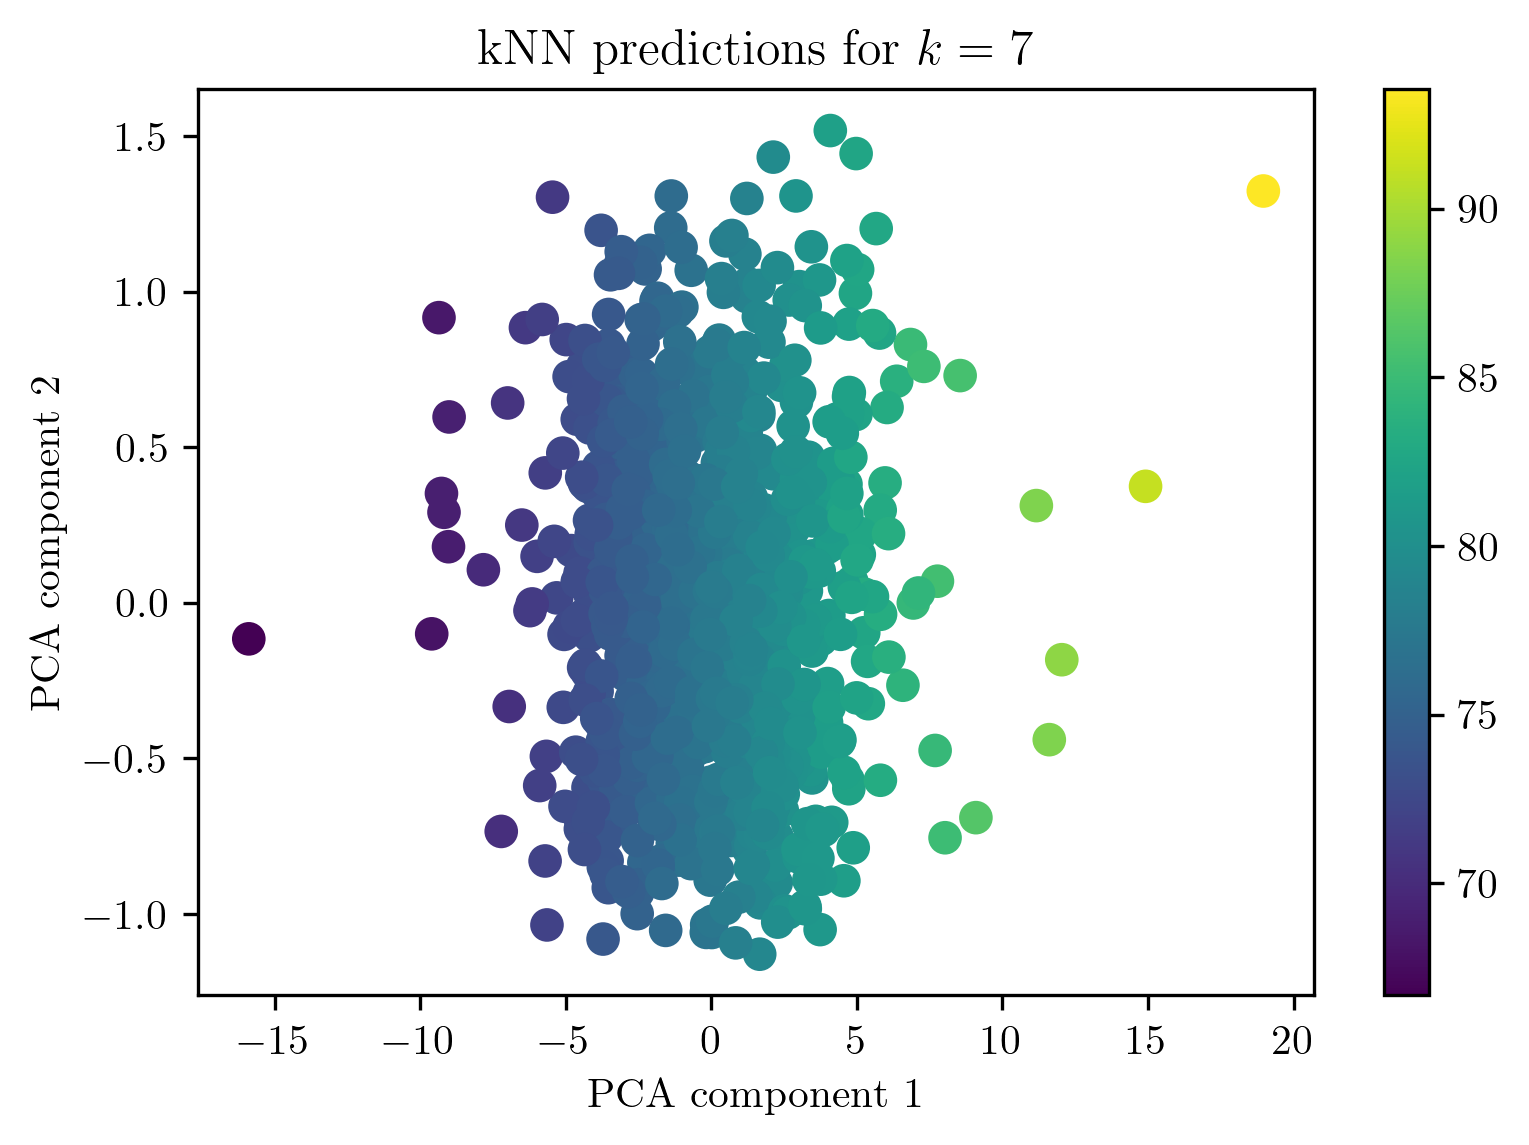

In [28]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=7$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

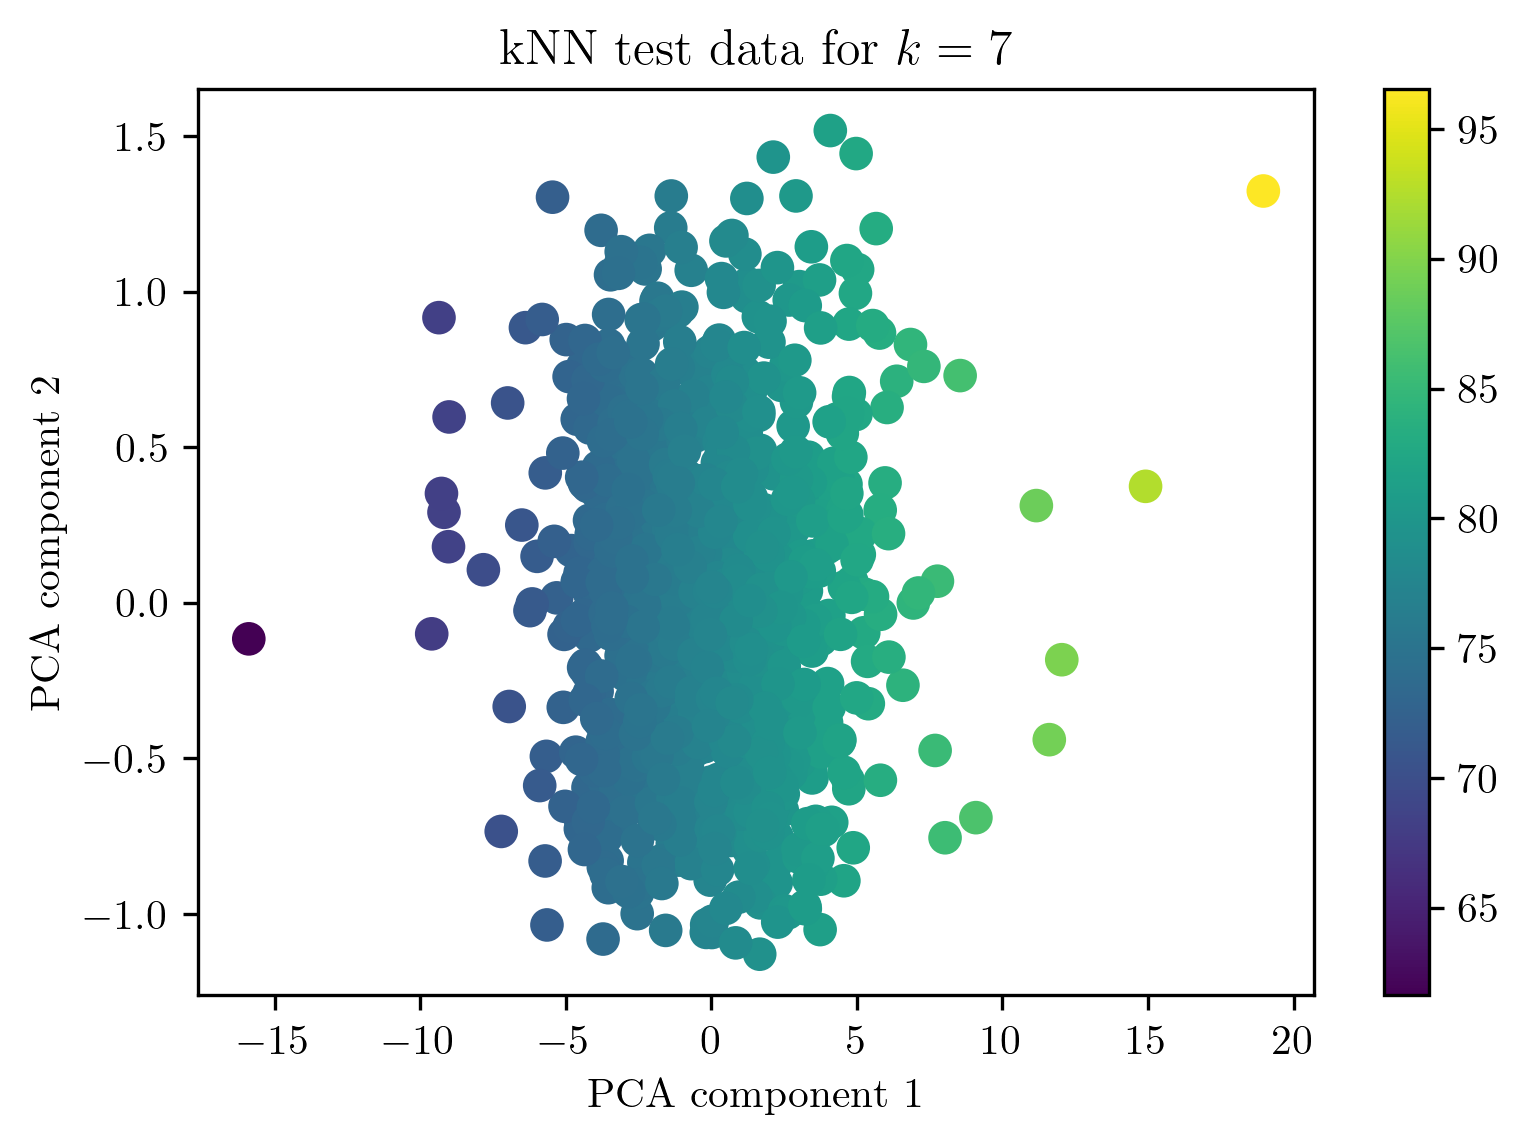

In [29]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=7$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

## Save the best predictions

In [30]:
y_pred=pd.DataFrame(y_pred, columns=['life_expectancy'])

In [31]:
y_pred.to_csv('y_pred_same_withpcs_withlocation_kNN.csv')

## Remove PCA, spectral embedding, and t-SNE columns

In [32]:
X

,fips,state,county,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,0.000000,0.00,0.000000,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,...,0.377300,-0.617581,0.679175,-0.616937,0.000319,-0.001135,0.000854,7.407887,2.971455,8.557061
1,0.000036,0.00,0.000318,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,...,0.275700,0.989203,0.559721,-0.697775,-0.000572,-0.000812,-0.001181,7.967915,-7.813225,-11.928781
2,0.000073,0.00,0.000636,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,...,0.984700,-2.269580,1.067954,-0.198612,0.001081,0.000067,0.000832,0.075141,6.000968,9.530168
3,0.000109,0.00,0.000955,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,...,0.573700,-3.954990,0.703167,-0.515253,0.001523,0.001325,-0.000975,-7.844172,6.632731,14.093078
4,0.000145,0.00,0.001273,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,...,0.498600,-3.363042,0.250616,-0.987891,0.001420,0.001000,-0.000423,-4.885995,6.370840,15.935434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.999927,1.00,0.998727,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,...,0.535200,1.742262,-0.324346,0.827852,-0.000855,-0.000251,-0.001153,2.224717,8.549556,-10.342960
3140,0.999964,1.00,0.999045,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,...,0.592800,1.945007,-0.577848,0.590881,-0.000947,-0.000035,-0.001048,4.515257,5.636350,-14.508990
3141,1.000000,1.00,0.999364,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,...,0.271600,3.054007,-0.601615,0.578433,-0.001263,0.000957,0.000265,-2.678241,5.768869,-15.942137
3142,0.672171,0.50,0.999682,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,...,0.392899,0.731736,0.018675,0.484228,-0.000450,-0.000988,-0.001003,3.145697,-4.512575,-4.056016


In [33]:
# Select the last 9 columns [2]
pcs = X.T.tail(9).T

In [34]:
pcs

,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,-0.617581,0.679175,-0.616937,0.000319,-0.001135,0.000854,7.407887,2.971455,8.557061
1,0.989203,0.559721,-0.697775,-0.000572,-0.000812,-0.001181,7.967915,-7.813225,-11.928781
2,-2.269580,1.067954,-0.198612,0.001081,0.000067,0.000832,0.075141,6.000968,9.530168
3,-3.954990,0.703167,-0.515253,0.001523,0.001325,-0.000975,-7.844172,6.632731,14.093078
4,-3.363042,0.250616,-0.987891,0.001420,0.001000,-0.000423,-4.885995,6.370840,15.935434
...,...,...,...,...,...,...,...,...,...
3139,1.742262,-0.324346,0.827852,-0.000855,-0.000251,-0.001153,2.224717,8.549556,-10.342960
3140,1.945007,-0.577848,0.590881,-0.000947,-0.000035,-0.001048,4.515257,5.636350,-14.508990
3141,3.054007,-0.601615,0.578433,-0.001263,0.000957,0.000265,-2.678241,5.768869,-15.942137
3142,0.731736,0.018675,0.484228,-0.000450,-0.000988,-0.001003,3.145697,-4.512575,-4.056016


In [35]:
X_removed = X.iloc[: , :-9]

In [36]:
X_removed

,fips,state,county,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,...,num_minorities,num_institutionalized_in_group_quarters,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_minorities,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,0.000000,0.00,0.000000,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,...,0.001816,0.002771,0.196400,0.831300,0.633900,0.679100,0.726800,0.125100,0.288100,0.377300
1,0.000036,0.00,0.000318,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,...,0.004554,0.016464,0.643700,0.447600,0.525300,0.973300,0.538700,0.343800,0.332400,0.275700
2,0.000073,0.00,0.000636,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,...,0.001954,0.016583,0.417400,0.361700,0.904200,0.281400,0.937000,0.942700,0.931200,0.984700
3,0.000109,0.00,0.000955,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,...,0.000773,0.011317,0.258500,0.308800,0.645000,0.407200,0.924900,0.915600,0.666300,0.573700
4,0.000145,0.00,0.001273,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,...,0.000966,0.003122,0.490900,0.646600,0.423800,0.134400,0.846500,0.151500,0.182700,0.498600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.999927,1.00,0.998727,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,...,0.000348,0.001380,0.044600,0.966900,0.421200,0.770500,0.875800,0.215900,0.656200,0.535200
3140,0.999964,1.00,0.999045,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,...,0.000199,0.000995,0.730000,0.800700,0.536100,0.346400,0.511600,0.537400,0.514200,0.592800
3141,1.000000,1.00,0.999364,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,...,0.000076,0.002013,0.615100,0.307500,0.288800,0.552100,0.861800,0.807700,0.633900,0.271600
3142,0.672171,0.50,0.999682,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,...,0.043998,0.091127,0.166922,0.744178,0.675575,0.879288,0.055045,0.329812,0.384675,0.392899


## Now, repeat without the principal components 

## Train-test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_removed, y, test_size=0.3, random_state=465)

## kNN Regressor Model

We follow from [1]. We first try with predicting a value by checking the 3 nearest neighbors. This is a parameter that we can tune later.

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [39]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
# Predict for the training set
y_train_pred = knn_model.predict(X_train)

In [41]:
mse = mean_squared_error(y_train, y_train_pred)
mse

1.6139112150586992

In [42]:
# RMSE
np.sqrt(mse)

1.2703980537842063

In [43]:
# Now, for the test set
y_pred = knn_model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

3.919842062259447

In [45]:
# RMSE
np.sqrt(mse)

1.9798591016179528

In [46]:
X_test

,fips,state,county,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,...,num_minorities,num_institutionalized_in_group_quarters,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_minorities,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
1480,0.493387,0.48,0.470888,0.520039,0.600219,0.404362,0.589404,0.61,0.211106,0.004511,...,0.001243,0.002715,0.5435,0.6692,0.8816,0.0971,0.7466,0.6154,0.8430,0.9452
2451,0.836531,0.84,0.779828,0.387876,0.484332,0.404462,0.501104,0.80,0.250911,0.009867,...,0.001691,0.002771,0.6332,0.2869,0.7198,0.1999,0.5775,0.2537,0.1299,0.3145
892,0.345324,0.32,0.283805,0.282916,0.325315,0.321318,0.589404,0.75,0.426184,0.005075,...,0.000654,0.002947,0.5237,0.7580,0.5380,0.5626,0.3295,0.4912,0.3419,0.5081
324,0.199985,0.18,0.103086,0.288579,0.528951,0.307951,0.379691,0.71,0.526955,0.116154,...,0.018413,0.035553,0.8723,0.1089,0.6329,0.9220,0.3566,0.2006,0.3649,0.4266
1105,0.367415,0.34,0.351575,0.459793,0.625742,0.463869,0.419426,0.71,0.382054,0.003947,...,0.000355,0.009100,0.2639,0.2120,0.5326,0.1662,0.6180,0.9392,0.6288,0.6141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.218371,0.20,0.126312,0.403162,0.407723,0.369793,0.534216,0.57,0.250101,0.038906,...,0.012584,0.036175,0.1885,0.8284,0.9347,0.8905,0.1130,0.7689,0.8733,0.9172
1027,0.364581,0.34,0.326758,0.390428,0.634066,0.455557,0.476821,0.76,0.417920,0.001692,...,0.000075,0.000181,0.3894,0.7791,0.0745,0.1098,0.9370,0.0229,0.5667,0.7892
480,0.221423,0.20,0.152720,0.394314,0.454407,0.373613,0.258278,0.66,0.282193,0.010431,...,0.001331,0.001855,0.3464,0.8669,0.8586,0.6062,0.8434,0.3649,0.9166,0.9484
538,0.223567,0.20,0.171174,0.367536,0.387463,0.314736,0.295806,0.71,0.261494,0.001410,...,0.000184,0.000028,0.5237,0.6663,0.8860,0.0000,0.9962,0.0210,0.2792,0.7663


In [47]:
X_test["percent_fair_or_poor_health"]

1480    0.520039
2451    0.387876
892     0.282916
324     0.288579
1105    0.459793
          ...   
397     0.403162
1027    0.390428
480     0.394314
538     0.367536
734     0.358789
Name: percent_fair_or_poor_health, Length: 944, dtype: float64

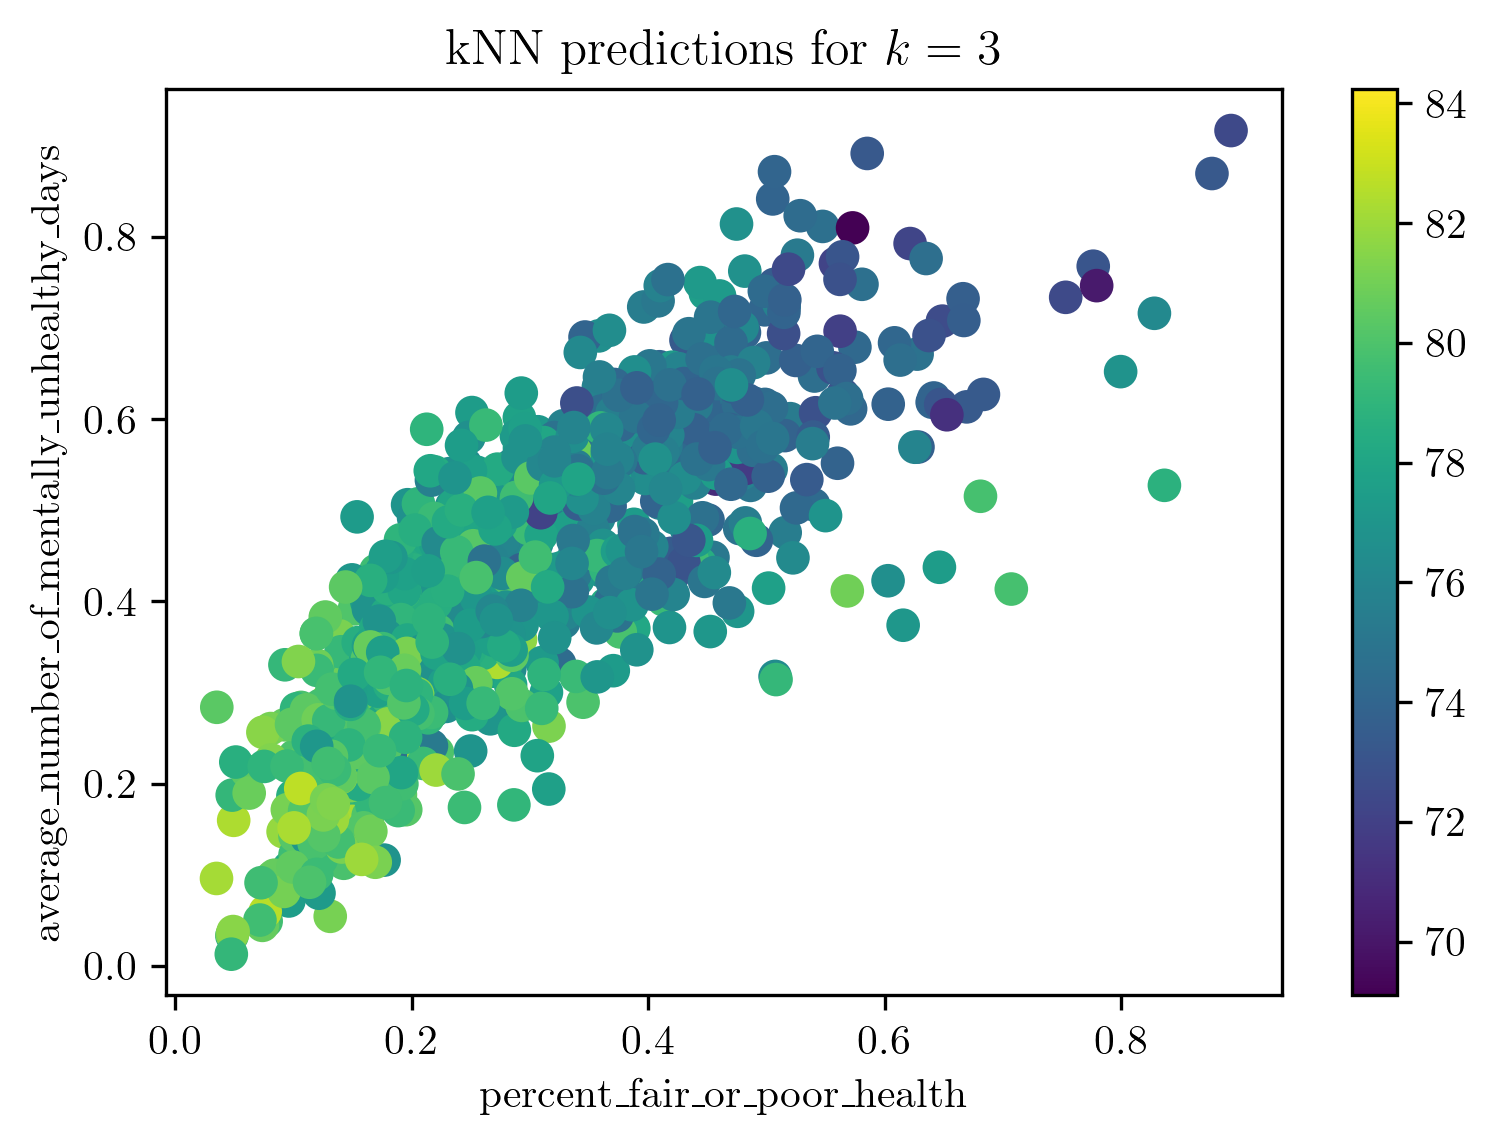

In [48]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=3$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

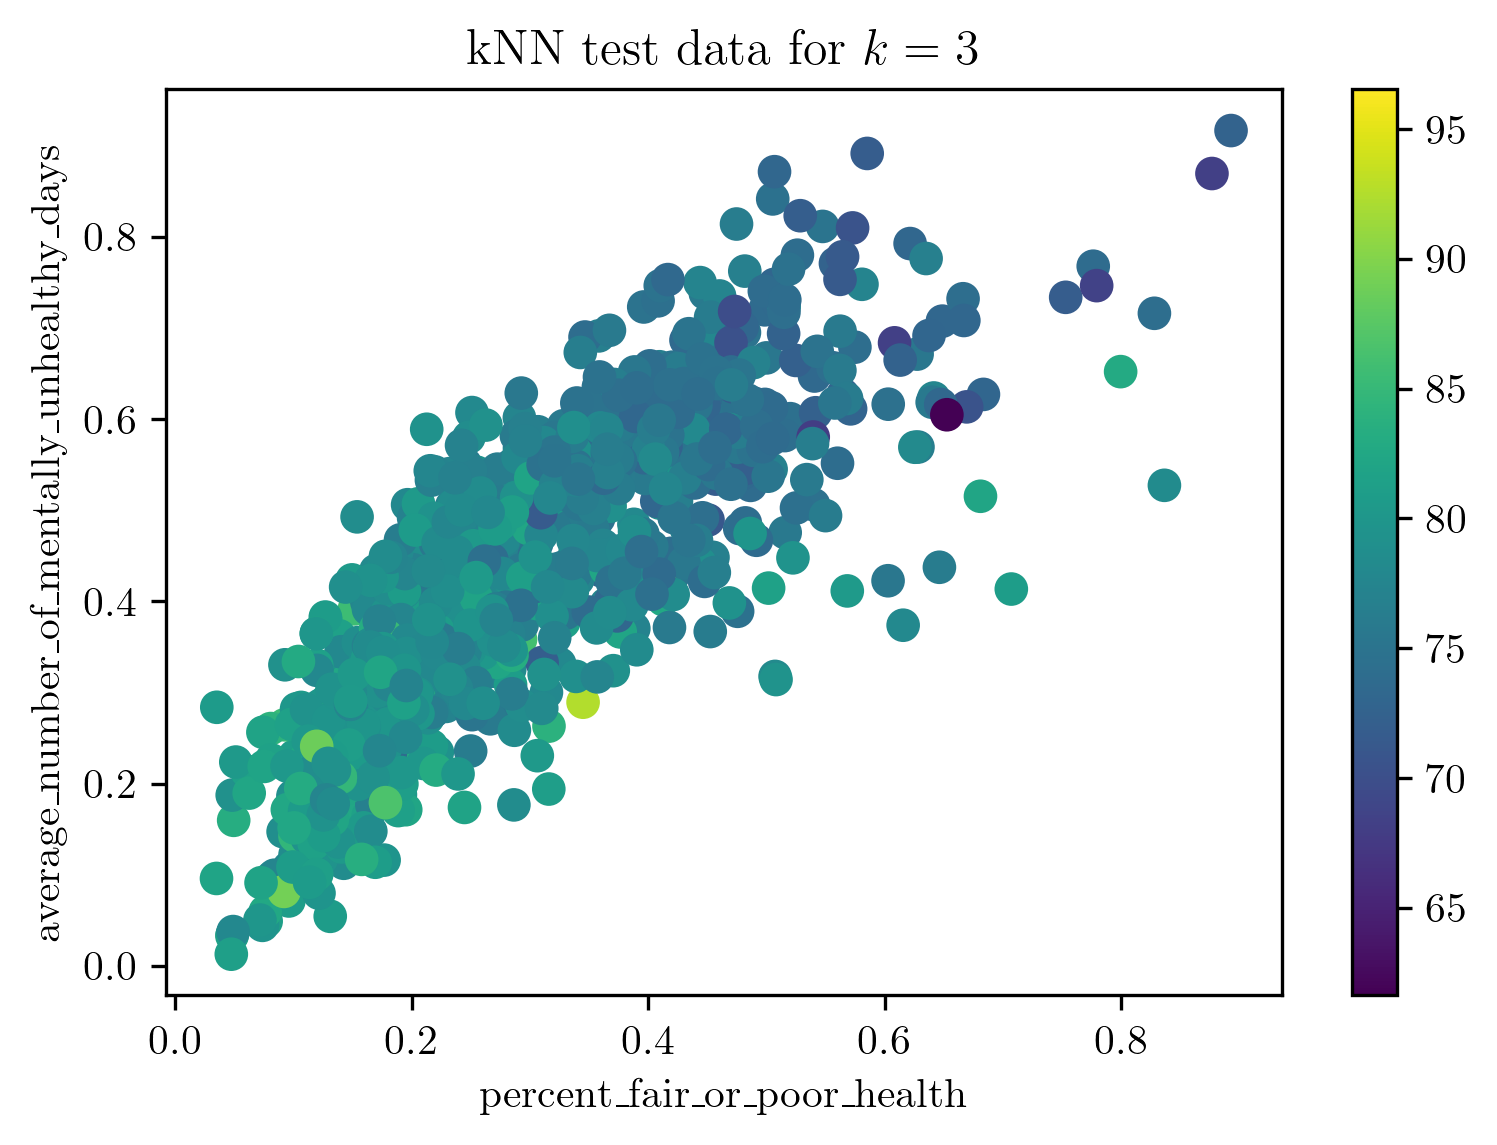

In [49]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=3$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

## Now, tune the parameter k

In [50]:
k_values=[1, 10, 100, 1000]

In [51]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=2.256997216947817, and MSE=5.094036437310192
For k=10
For training set, RMSE=1.6209036658973712, and MSE=2.627328694119537
For test set, RMSE=1.939569360693884, and MSE=3.761929304942482
For k=100
For training set, RMSE=2.0432481211792304, and MSE=4.174862884702455
For test set, RMSE=2.138459193901473, and MSE=4.573007723981738
For k=1000
For training set, RMSE=2.5020628676884358, and MSE=6.2603185938652794
For test set, RMSE=2.5279848114935914, and MSE=6.390707207142288


In [52]:
k_values=np.arange(10)+1

In [53]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=2.256997216947817, and MSE=5.094036437310192
For k=2
For training set, RMSE=1.0928152746439268, and MSE=1.194245224495081
For test set, RMSE=2.0365862823733027, and MSE=4.147683685551111
For k=3
For training set, RMSE=1.2703980537842063, and MSE=1.6139112150586992
For test set, RMSE=1.9798591016179528, and MSE=3.919842062259447
For k=4
For training set, RMSE=1.3653848117251877, and MSE=1.8642756840898262
For test set, RMSE=1.9606689959004417, and MSE=3.844222911485246
For k=5
For training set, RMSE=1.4336210632158546, and MSE=2.0552693528961576
For test set, RMSE=1.9382999165186767, and MSE=3.7570065663763095
For k=6
For training set, RMSE=1.484210679442417, and MSE=2.2028813409709214
For test set, RMSE=1.936590218404022, and MSE=3.7503816740181373
For k=7
For training set, RMSE=1.524694195950498, and MSE=2.3246923911651356
For test set, RMSE=1.942176812958324, and MSE=3.772050772792952
For k=8
For training set, RMSE=1.

This time $k=6$.

In [54]:
k=6

In [55]:
print(r'For k='+str(k))
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse=np.sqrt(mse)
print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=6
For training set, RMSE=1.484210679442417, and MSE=2.2028813409709214
For test set, RMSE=1.936590218404022, and MSE=3.7503816740181373


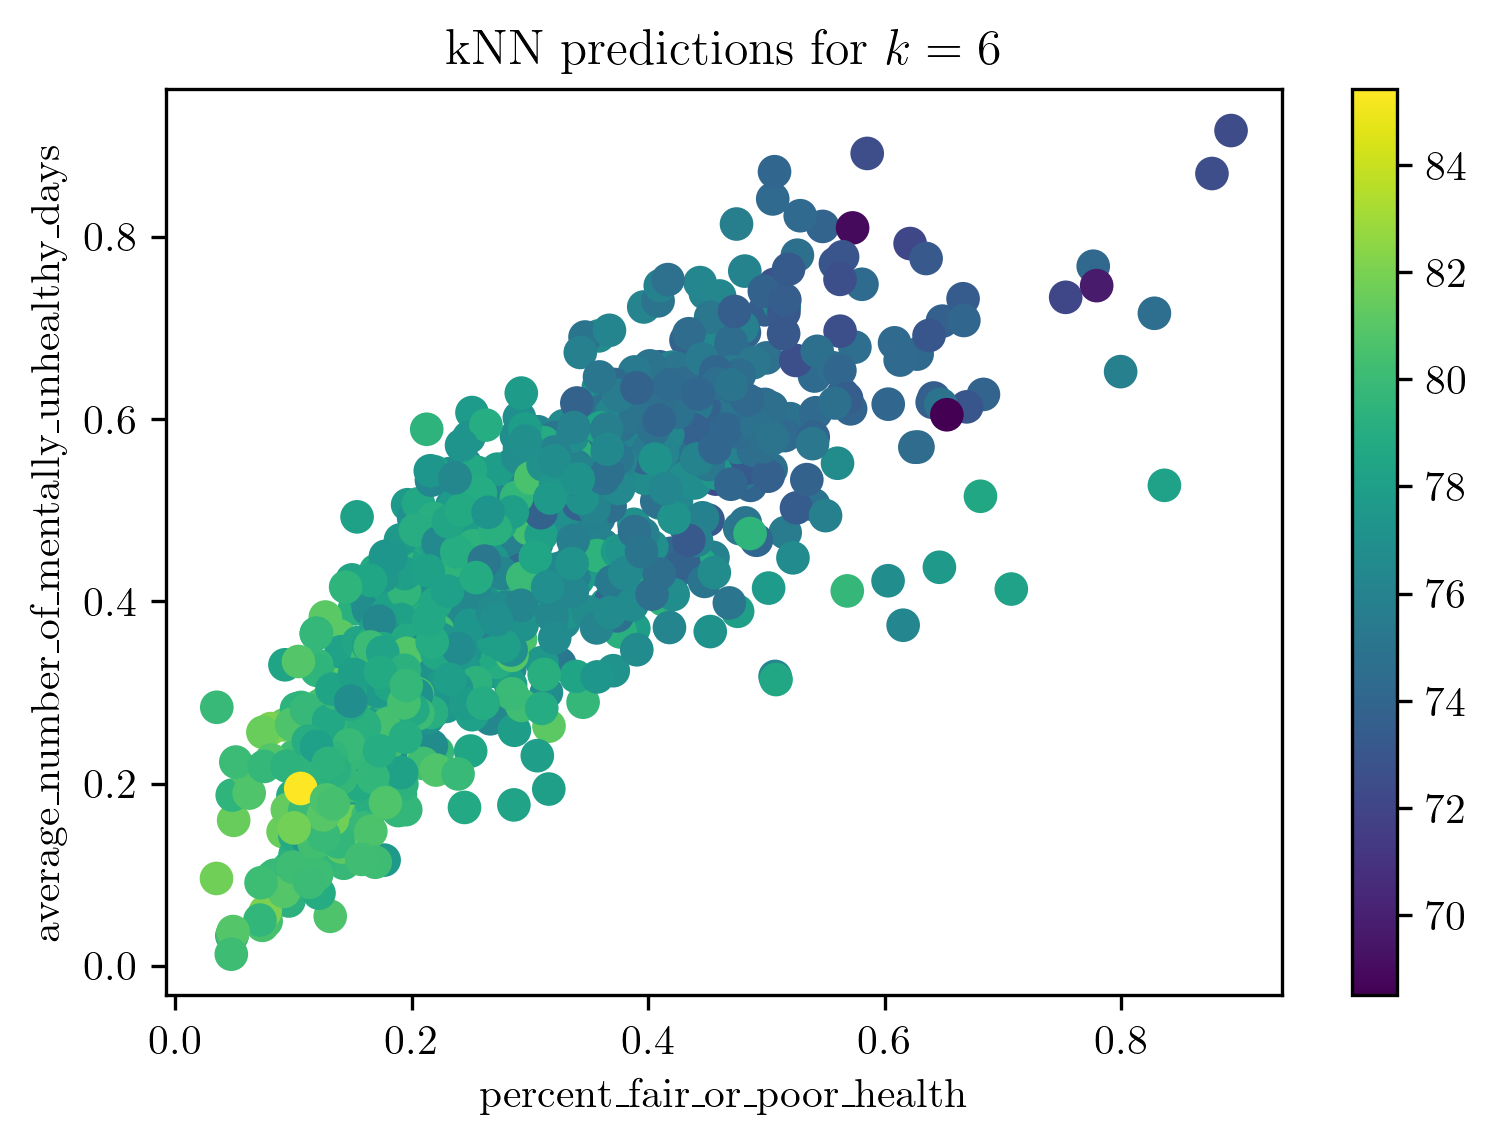

In [56]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=6$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

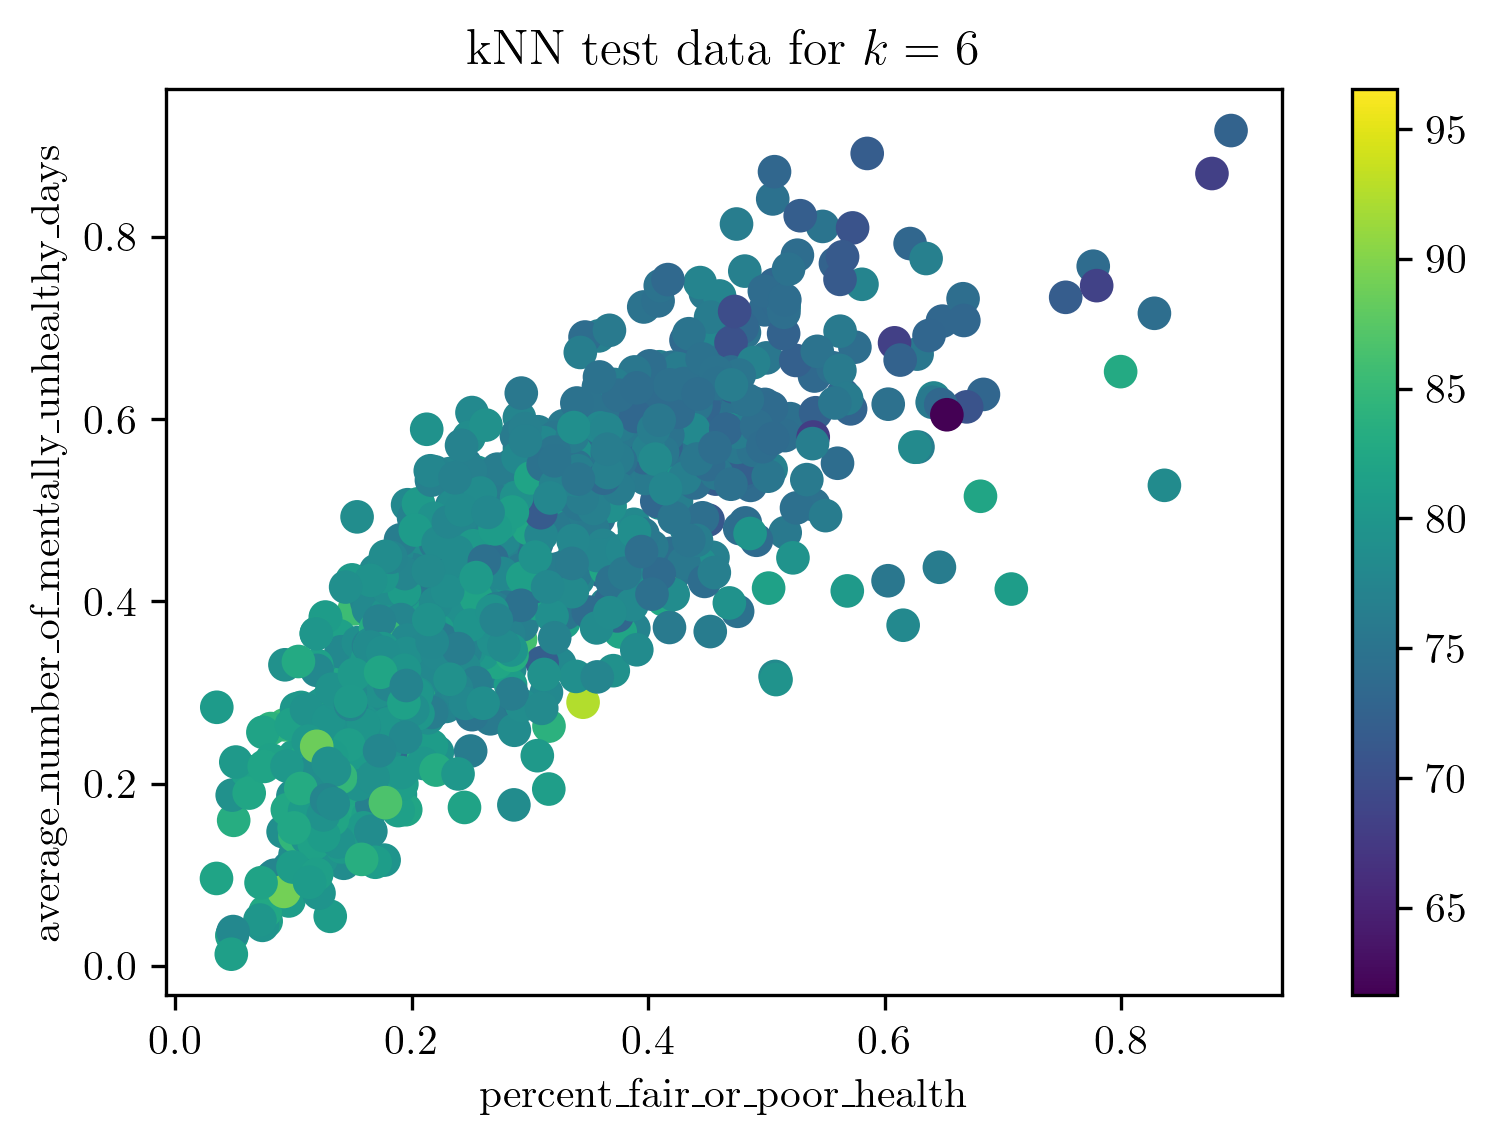

In [57]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=6$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

## References

[1] https://realpython.com/knn-python/#:~:text=The%20kNN%20algorithm%20is%20a,in%20Python%3A%20A%20Practical%20Guide.

[2] https://thispointer.com/pandas-select-last-n-columns-of-dataframe/